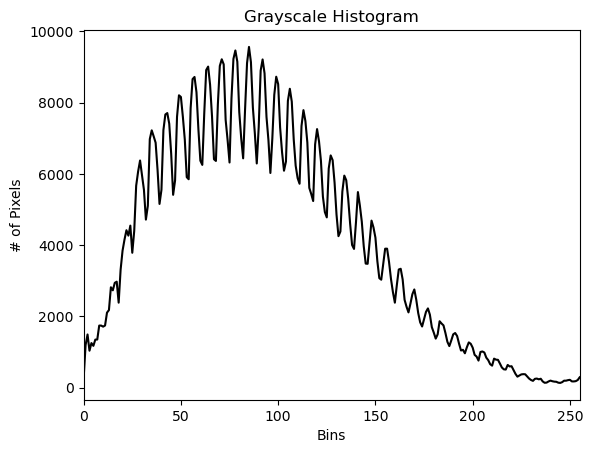

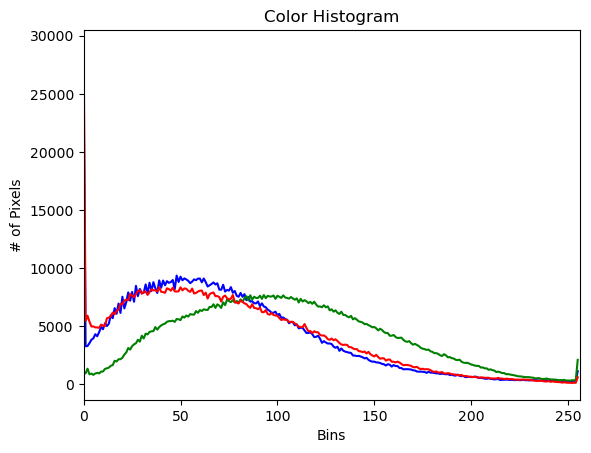

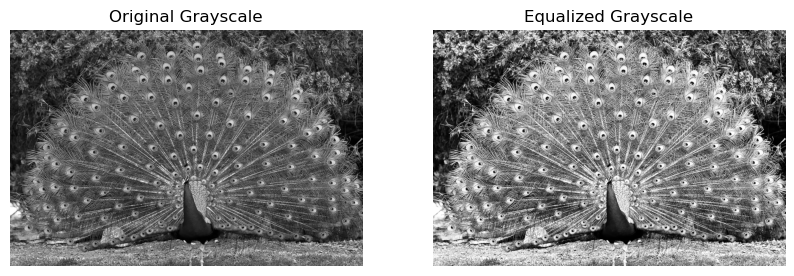

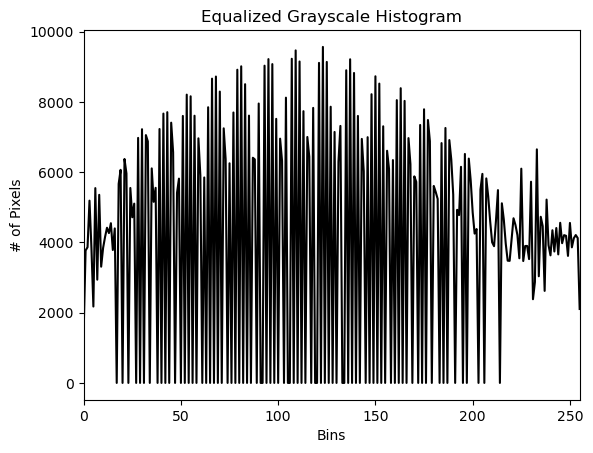

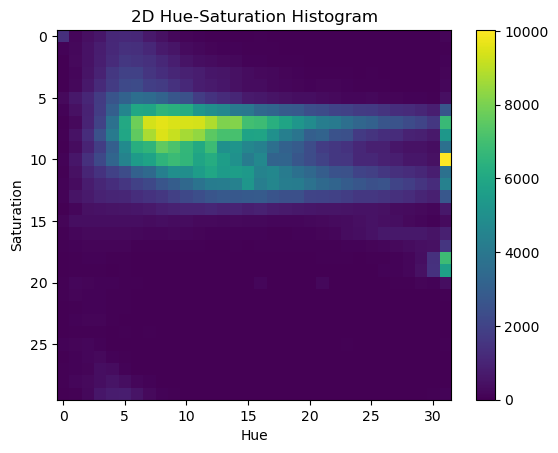

In [1]:
# 🧪 Exno.2 – Implementation of Histogram

# Import required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to plot a 1D histogram
def plot_histogram(title, hist, bins=256, color='k'):
    plt.figure()
    plt.title(title)
    plt.xlabel('Bins')
    plt.ylabel('# of Pixels')
    plt.plot(hist, color=color)
    plt.xlim([0, bins - 1])
    plt.show()

# Main function
def main():
    # Load the image (Update path as needed)
    img = cv2.imread(r'peacock.webp')
    if img is None:
        print("⚠️ Error loading image! Check your path.")
        return

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 1️⃣ Grayscale histogram
    hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])
    plot_histogram('Grayscale Histogram', hist_gray, color='k')

    # 2️⃣ Color histograms for B, G, R channels
    colors = ('b', 'g', 'r')
    plt.figure()
    plt.title('Color Histogram')
    plt.xlabel('Bins')
    plt.ylabel('# of Pixels')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.xlim([0, 256])
    plt.show()

    # 3️⃣ Histogram equalization on grayscale image
    eq_gray = cv2.equalizeHist(gray)
    hist_eq = cv2.calcHist([eq_gray], [0], None, [256], [0, 256])

    # Display original and equalized grayscale side-by-side (using matplotlib for Jupyter)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(eq_gray, cmap='gray')
    plt.title('Equalized Grayscale')
    plt.axis('off')
    plt.show()

    # Plot histogram of equalized image
    plot_histogram('Equalized Grayscale Histogram', hist_eq, color='k')

    # 4️⃣ 2D Histogram: Hue-Saturation in HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist_2d = cv2.calcHist([hsv], [0, 1], None, [30, 32], [0, 180, 0, 256])

    plt.figure()
    plt.title('2D Hue-Saturation Histogram')
    plt.xlabel('Hue')
    plt.ylabel('Saturation')
    plt.imshow(hist_2d, interpolation='nearest')
    plt.colorbar()
    plt.show()

# Run the main function
if __name__ == '__main__':
    main()
